In [160]:
%matplotlib inline
from matplotlib import pyplot as plt
import ipywidgets as widgets
from ipywidgets import HBox, VBox
from ipywidgets import interact, interactive, fixed, interact_manual
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import skimage
from skimage.viewer import ImageViewer
import sys
import numpy as np
from matplotlib import pyplot as plt

# TODO: Convert to web-link
path = "/Users/tischer/Documents/notebooks-playground/data/blobs_000.tif"

input_image = skimage.io.imread(fname = path)

h = {}
h['images'] = {"input_image": input_image}
h['batch_mode'] = False

In [163]:
def blur_core(h, module_id, input_image_key, sigma, show_output):
    input_image = h['images'].get(input_image_key)
    # compute
    blurred_image = skimage.filters.gaussian(input_image, sigma=(sigma, sigma), multichannel=True)
    # store parameters and output
    h['images'][module_id] = blurred_image
    h[module_id] = {}
    h[module_id]['sigma'] = sigma
    h[module_id]['input_image_key'] = input_image_key
    h[module_id]['output_image_key'] = module_id
    # show output
    if show_output:
        plt.imshow(blurred_image, cmap='gray')
    
def blur(h, module_id):
    if h['batch_mode']:
        if not module_id in h.keys():
            # throw an error
        input_image_key = h[module_id]['input_image_key']    
        sigma = h[module_id].get('sigma')
        return blur_core(h, module_id, input_image_key, sigma, show_output = False)
    else:
        # TODO: deal with default values
        return interactive(blur_core, 
                           h = fixed(h),
                           module_id = fixed(module_id), 
                           input_image_key = widgets.Dropdown(options=h['images'].keys()), 
                           sigma = widgets.IntSlider(min=0, max=50, step=1),
                           show_output = fixed(True))

## Blur an image
If `h['batch_mode'] = False` it will show an interactive UI.

If `h['batch_mode'] = True` it will just do its job, using the paramteres configured with the interactive UI.

In [168]:
blur(h, "blurred_input")

interactive(children=(Dropdown(description='input_image_key', options=('input_image', 'first_blur'), value='in…

dict_keys(['images', 'batch_mode', 'first_blur', 'blurred_input'])
dict_keys(['input_image', 'first_blur', 'blurred_input'])
dict_keys(['sigma', 'input_image_key', 'output_image_key'])


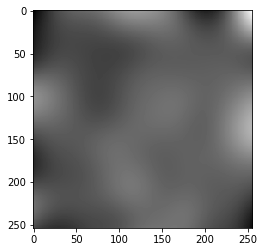

In [175]:
print(h.keys())
print(h['images'].keys())
print(h['blurred_input'].keys())
plt.imshow(h['images']['blurred_input'], cmap='gray')